<a href="https://colab.research.google.com/github/Ifrahaha/Deep-Neural-Network-using-Tensorflow/blob/main/04_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2021-07-12 07:32:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 66.102.1.128, 142.250.110.128, 142.251.5.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|66.102.1.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  45.2MB/s    in 3.6s    

2021-07-12 07:33:02 (45.2 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
import os 
for dirpath , dirnames , filenames in os.walk("10_food_classes_10_percent"):
  print(f"there are {len(dirnames)} directories and {len(filenames )} images in {dirpath}")

there are 2 directories and 0 images in 10_food_classes_10_percent
there are 10 directories and 0 images in 10_food_classes_10_percent/test
there are 0 directories and 250 images in 10_food_classes_10_percent/test/ramen
there are 0 directories and 250 images in 10_food_classes_10_percent/test/sushi
there are 0 directories and 250 images in 10_food_classes_10_percent/test/ice_cream
there are 0 directories and 250 images in 10_food_classes_10_percent/test/steak
there are 0 directories and 250 images in 10_food_classes_10_percent/test/grilled_salmon
there are 0 directories and 250 images in 10_food_classes_10_percent/test/hamburger
there are 0 directories and 250 images in 10_food_classes_10_percent/test/pizza
there are 0 directories and 250 images in 10_food_classes_10_percent/test/chicken_curry
there are 0 directories and 250 images in 10_food_classes_10_percent/test/chicken_wings
there are 0 directories and 250 images in 10_food_classes_10_percent/test/fried_rice
there are 10 directori

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224 , 224)
BATCH_SIZE  =32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

print("Traing images")

train_data_10_percent = train_datagen.flow_from_directory(train_dir , 
                                                          target_size = IMAGE_SHAPE , 
                                                          batch_size = BATCH_SIZE , 
                                                          class_mode="categorical")

print("Testing images")

test_data = test_datagen.flow_from_directory(             test_dir , 
                                                          target_size = IMAGE_SHAPE , 
                                                          batch_size = BATCH_SIZE , 
                                                          class_mode="categorical")



Traing images
Found 750 images belonging to 10 classes.
Testing images
Found 2500 images belonging to 10 classes.


In [45]:
import datetime
def create_tensorboard_callback(dir_name , experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= log_dir)
  print(f"saving to : {log_dir}")
  return tensorboard_callback

In [35]:
eff_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

res_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [36]:
import tensorflow as tf
import tensorflow_hub as hub 
from tensorflow.keras import layers

In [37]:
def create_model(model_url , num_classes=10):

  feature_extractor_layer = hub.KerasLayer(model_url , 
                                           trainable=False, 
                                           name="feature_extractor_layer" , 
                                           input_shape = IMAGE_SHAPE+(3,))
  
  model= tf.keras.Sequential([
                              feature_extractor_layer , 
                              layers.Dense(num_classes , activation="softmax" , name= "output_layer")
  ])

  return model

In [38]:
resnet_model = create_model(res_url , 
                            num_classes=train_data_10_percent.num_classes)

In [39]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extractor_layer (Ker (None, 2048)              23564800  
_________________________________________________________________
output_layer (Dense)         (None, 10)                20490     
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [40]:
train_data_10_percent.num_classes

10

In [41]:
resnet_model.compile(loss = "categorical_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [46]:
resnet_history = resnet_model.fit(train_data_10_percent , 
                 epochs = 5 , 
                 steps_per_epoch = len(train_data_10_percent) , 
                 validation_data=test_data , 
                 validation_steps=len(test_data) , 
                 callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub" , 
                                                        experiment_name="resnet50V2")
                 ])

saving to : tensorflow_hub/resnet50V2/20210712-081929
Epoch 1/5
24/24 [==============================] - 57s 1s/step - loss: 2.0560 - accuracy: 0.3053 - val_loss: 1.3744 - val_accuracy: 0.5516
Epoch 2/5
24/24 [==============================] - 21s 914ms/step - loss: 0.9920 - accuracy: 0.7107 - val_loss: 0.8968 - val_accuracy: 0.7216
Epoch 3/5
24/24 [==============================] - 21s 915ms/step - loss: 0.6594 - accuracy: 0.8040 - val_loss: 0.7754 - val_accuracy: 0.7504
Epoch 4/5
24/24 [==============================] - 21s 914ms/step - loss: 0.5035 - accuracy: 0.8600 - val_loss: 0.7119 - val_accuracy: 0.7736
Epoch 5/5
24/24 [==============================] - 21s 911ms/step - loss: 0.3962 - accuracy: 0.9053 - val_loss: 0.6902 - val_accuracy: 0.7800


In [50]:
import matplotlib.pyplot as plt 

def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs , loss  , label="training_loss")
  plt.plot(epochs , val_loss , label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs , accuracy  , label="training_accuracy")
  plt.plot(epochs , val_accuracy , label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

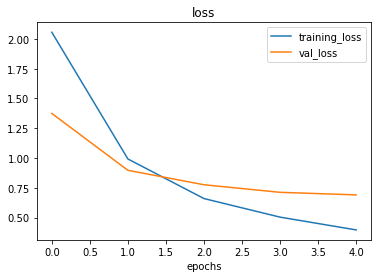

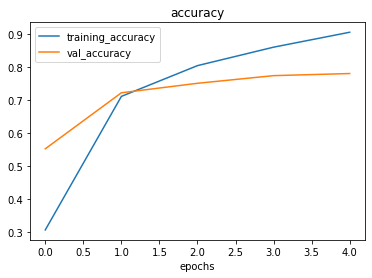

In [51]:
plot_loss_curves(resnet_history)

In [52]:
eff_model = create_model(model_url=eff_url , 
                         num_classes = train_data_10_percent.num_classes)

eff_model.compile(loss = "categorical_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

eff_history = eff_model.fit(train_data_10_percent , 
                            epochs = 5 , 
                            steps_per_epoch=len(train_data_10_percent) , 
                            validation_data = test_data , 
                            validation_steps = len(test_data) ,
                            callbacks = [create_tensorboard_callback(dir_name="tensorflow_hub" , 
                                                                     experiment_name = "effnetb0")])

saving to : tensorflow_hub/effnetb0/20210712-083143
Epoch 1/5
24/24 [==============================] - 33s 1s/step - loss: 1.8457 - accuracy: 0.4507 - val_loss: 1.3143 - val_accuracy: 0.7272
Epoch 2/5
24/24 [==============================] - 19s 815ms/step - loss: 1.0548 - accuracy: 0.7773 - val_loss: 0.8655 - val_accuracy: 0.8244
Epoch 3/5
24/24 [==============================] - 19s 814ms/step - loss: 0.7498 - accuracy: 0.8427 - val_loss: 0.6989 - val_accuracy: 0.8508
Epoch 4/5
24/24 [==============================] - 19s 813ms/step - loss: 0.6001 - accuracy: 0.8813 - val_loss: 0.6125 - val_accuracy: 0.8600
Epoch 5/5
24/24 [==============================] - 19s 810ms/step - loss: 0.5096 - accuracy: 0.9013 - val_loss: 0.5611 - val_accuracy: 0.8668


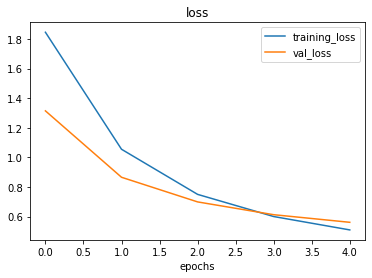

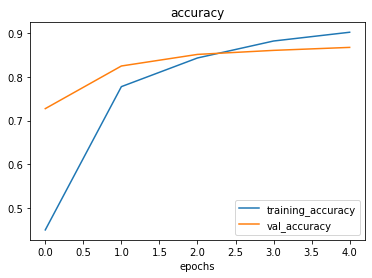

In [53]:
plot_loss_curves(eff_history)

In [54]:
eff_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extractor_layer (Ker (None, 1280)              4049564   
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [55]:
len(eff_model.layers[0].weights)

309